In [1]:
#  pip install numpy

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

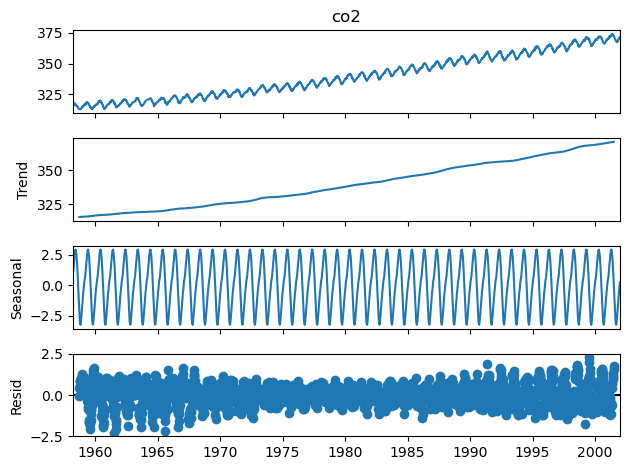

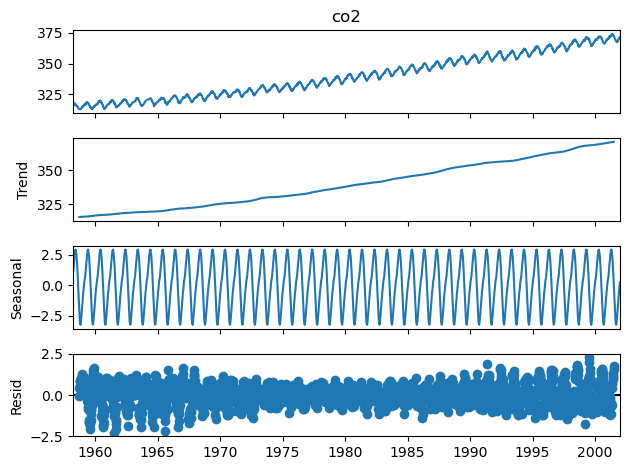

In [3]:
import statsmodels.api as sm

dta = sm.datasets.co2.load_pandas().data
# deal with missing values. see issue
dta.co2.interpolate(inplace=True)

res = sm.tsa.seasonal_decompose(dta.co2)
res.plot()

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [7]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [8]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [9]:
df.head(10)

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0
5,1962-06,697.0
6,1962-07,640.0
7,1962-08,599.0
8,1962-09,568.0
9,1962-10,577.0


In [10]:
df.columns = ['Month', 'Milk in pounds per cow']

In [11]:
df.tail(15)

,Month,Milk in pounds per cow
154,1974-11,773.0
155,1974-12,813.0
156,1975-01,834.0
157,1975-02,782.0
158,1975-03,892.0
159,1975-04,903.0
160,1975-05,966.0
161,1975-06,937.0
162,1975-07,896.0
163,1975-08,858.0


In [12]:
df.drop(168,axis = 0,inplace = True)

In [13]:
df['Month'] = pd.to_datetime(df['Month'])

In [14]:
df['Month']

0     1962-01-01
1     1962-02-01
2     1962-03-01
3     1962-04-01
4     1962-05-01
         ...    
163   1975-08-01
164   1975-09-01
165   1975-10-01
166   1975-11-01
167   1975-12-01
Name: Month, Length: 168, dtype: datetime64[ns]

In [15]:
df.set_index('Month',inplace=True)

In [16]:
df

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0
...,...
1975-08-01,858.0
1975-09-01,817.0
1975-10-01,827.0


In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in pounds per cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


In [18]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

<Axes: xlabel='Month'>

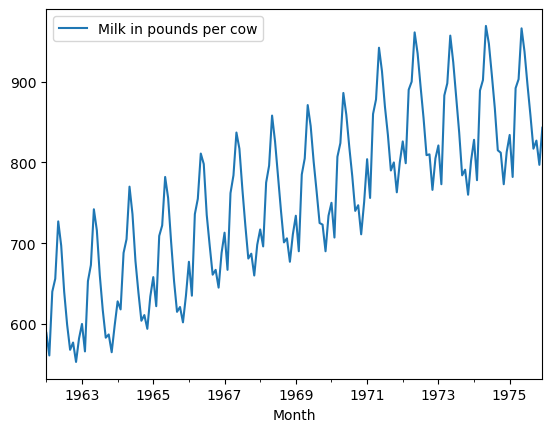

In [19]:
df.plot()

In [22]:
timeseries = df['Milk in pounds per cow']

In [23]:
type(timeseries)

pandas.core.series.Series

<Axes: xlabel='Month'>

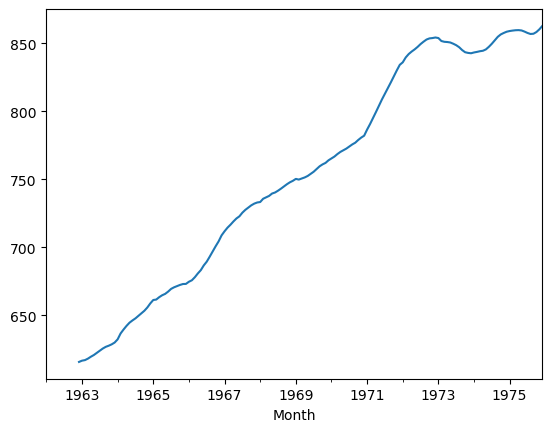

In [24]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')

<Axes: xlabel='Month'>

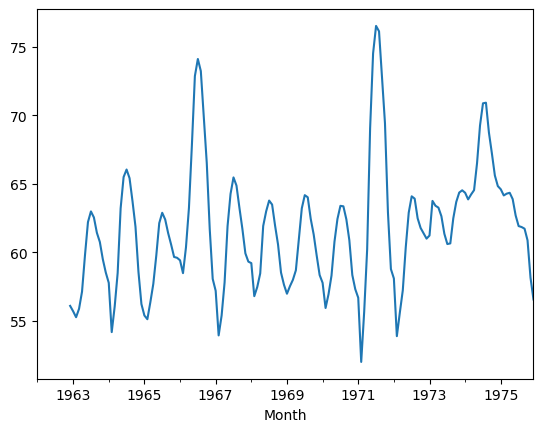

In [25]:
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')

<Axes: xlabel='Month'>

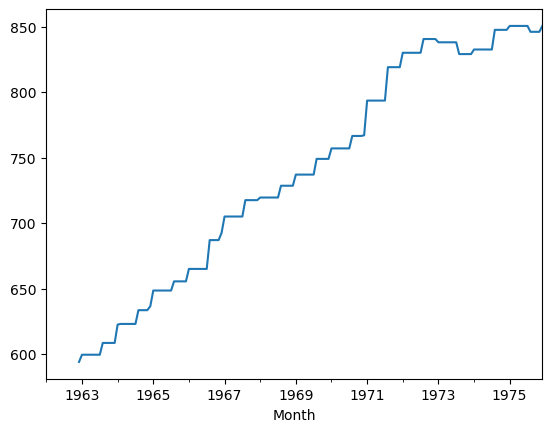

In [27]:
timeseries.rolling(12).median().plot(label='12 Month Rolling median')

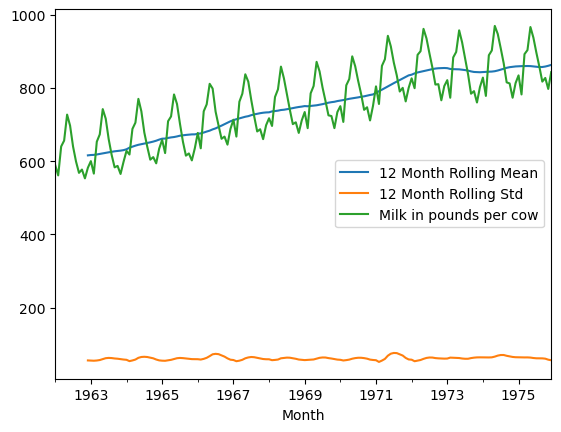

In [29]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()
plt.show()

In [38]:
decomposition = seasonal_decompose(df['Milk in pounds per cow'],freq = 10)  

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

In [39]:
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12,9)

NameError: name 'decomposition' is not defined

<Figure size 640x480 with 0 Axes>

In [40]:
df.head()

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [41]:
from statsmodels.tsa.stattools import adfuller

In [42]:
result = adfuller(df['Milk in pounds per cow'])

In [43]:
labels = ['ADF Test Statistic',
          'p-value',
          '#Lags Used',
          'Number of Observations Used']

In [44]:
labels

['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']

In [45]:
for value,label in zip(result,labels):
    print(label+' : '+str(value) )

ADF Test Statistic : -1.3038115874221312
p-value : 0.6274267086030308
#Lags Used : 13
Number of Observations Used : 154


In [46]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic',
              'p-value',
              '#Lags Used',
              'Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [47]:
df['Milk First Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(1)

In [48]:
df['Milk First Difference'] 

Month
1962-01-01     NaN
1962-02-01   -28.0
1962-03-01    79.0
1962-04-01    16.0
1962-05-01    71.0
              ... 
1975-08-01   -38.0
1975-09-01   -41.0
1975-10-01    10.0
1975-11-01   -30.0
1975-12-01    46.0
Name: Milk First Difference, Length: 168, dtype: float64

In [49]:
adf_check(df['Milk First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.0549955586530544
p-value : 0.03006800400178694
#Lags Used : 14
Number of Observations Used : 152
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


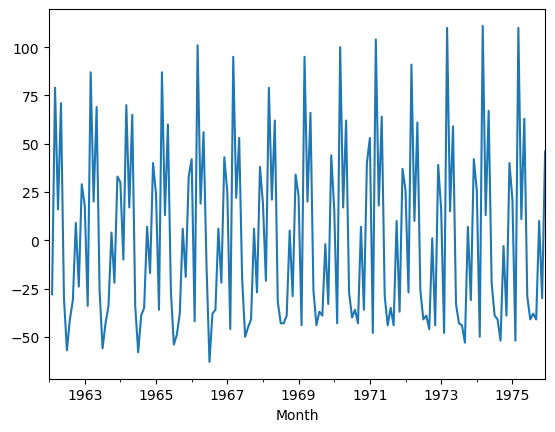

In [50]:
df['Milk First Difference'].plot()
plt.show()

In [51]:
df['Seasonal Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(12)

In [52]:
df['Seasonal Difference']

Month
1962-01-01     NaN
1962-02-01     NaN
1962-03-01     NaN
1962-04-01     NaN
1962-05-01     NaN
              ... 
1975-08-01    -9.0
1975-09-01     2.0
1975-10-01    15.0
1975-11-01    24.0
1975-12-01    30.0
Name: Seasonal Difference, Length: 168, dtype: float64

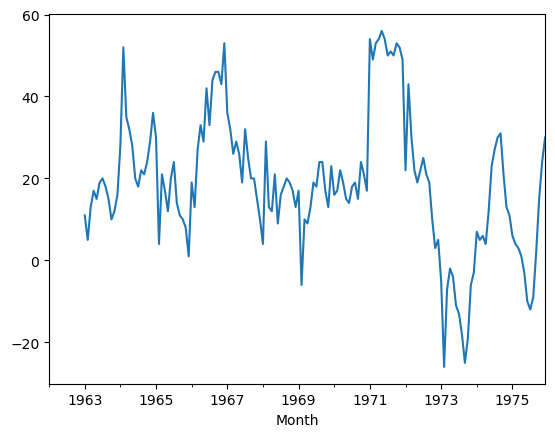

In [53]:
df['Seasonal Difference'].plot()
plt.show()

In [54]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.3354193143593953
p-value : 0.1607988052771142
#Lags Used : 12
Number of Observations Used : 143
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [55]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

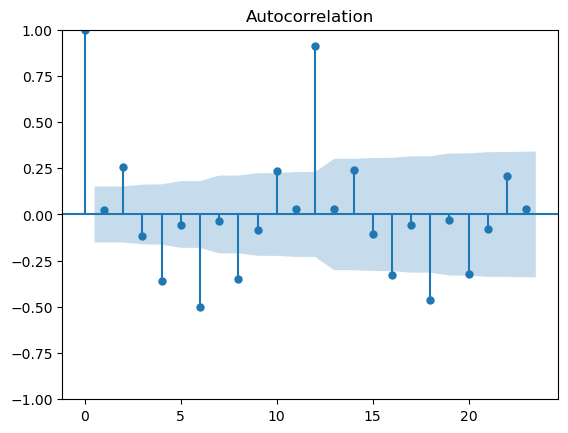

In [56]:
fig_first = plot_acf(df["Milk First Difference"].dropna())

In [57]:
k=df["Milk First Difference"].dropna()
k

Month
1962-02-01   -28.0
1962-03-01    79.0
1962-04-01    16.0
1962-05-01    71.0
1962-06-01   -30.0
              ... 
1975-08-01   -38.0
1975-09-01   -41.0
1975-10-01    10.0
1975-11-01   -30.0
1975-12-01    46.0
Name: Milk First Difference, Length: 167, dtype: float64

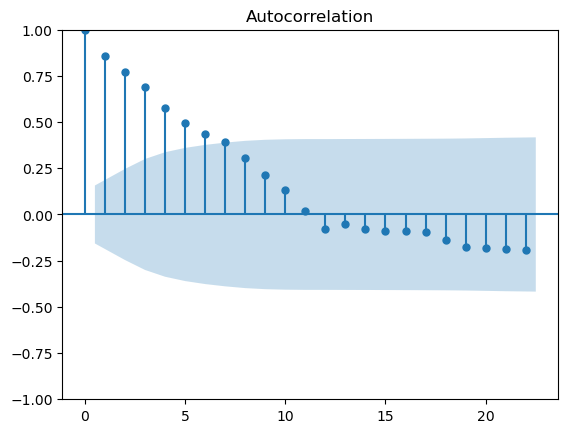

In [59]:
fig_seasonal_first = plot_acf(df["Seasonal Difference"].dropna())

In [60]:
from pandas.plotting import autocorrelation_plot

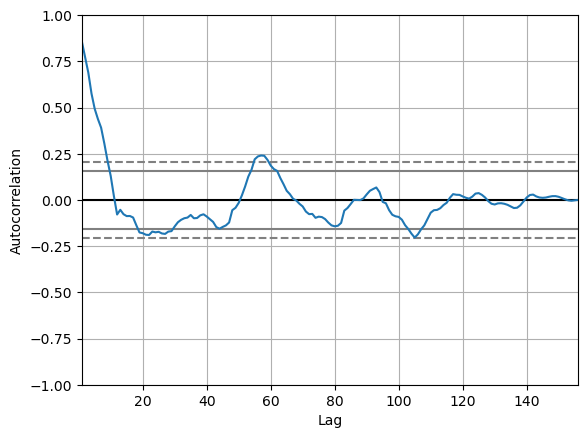

In [61]:
autocorrelation_plot(df['Seasonal Difference'].dropna())
plt.show()

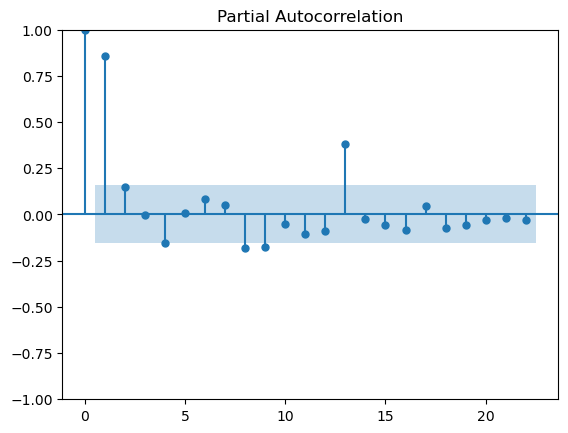

In [62]:
result = plot_pacf(df["Seasonal Difference"].dropna())

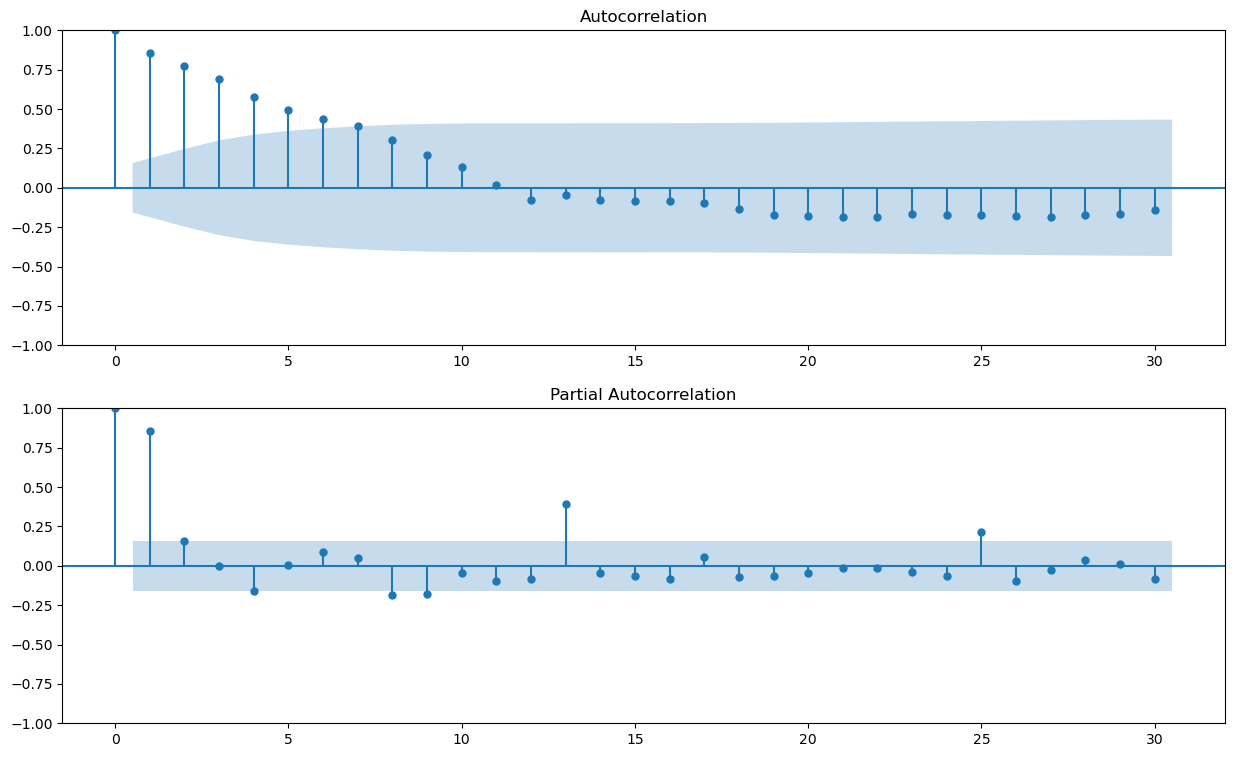

In [63]:
fig = plt.figure(figsize = (15,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal Difference'].iloc[13:],lags = 30,ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal Difference'].iloc[13:],lags = 30, ax = ax2)

In [64]:
from statsmodels.tsa.arima_model import ARIMA

In [65]:
model = sm.tsa.statespace.SARIMAX(df['Milk in pounds per cow'],order = (0,1,0),seasonal_order = (1,1,1,10))

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [66]:
results = model.fit()
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:               Milk in pounds per cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 10)   Log Likelihood                -830.492
Date:                              Tue, 09 Apr 2024   AIC                           1666.983
Time:                                      14:37:59   BIC                           1676.152
Sample:                                  01-01-1962   HQIC                          1670.707
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L10       0.2981      0.122      2.441      0.015       0.059       0.537
ma.S.L10      -0.99

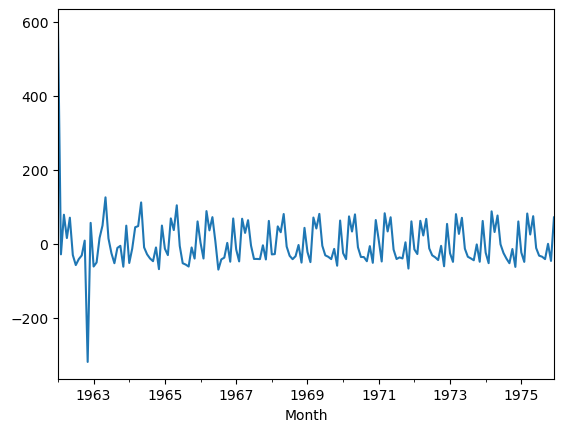

In [67]:
results.resid.plot()
plt.show()

<Axes: xlabel='Month'>

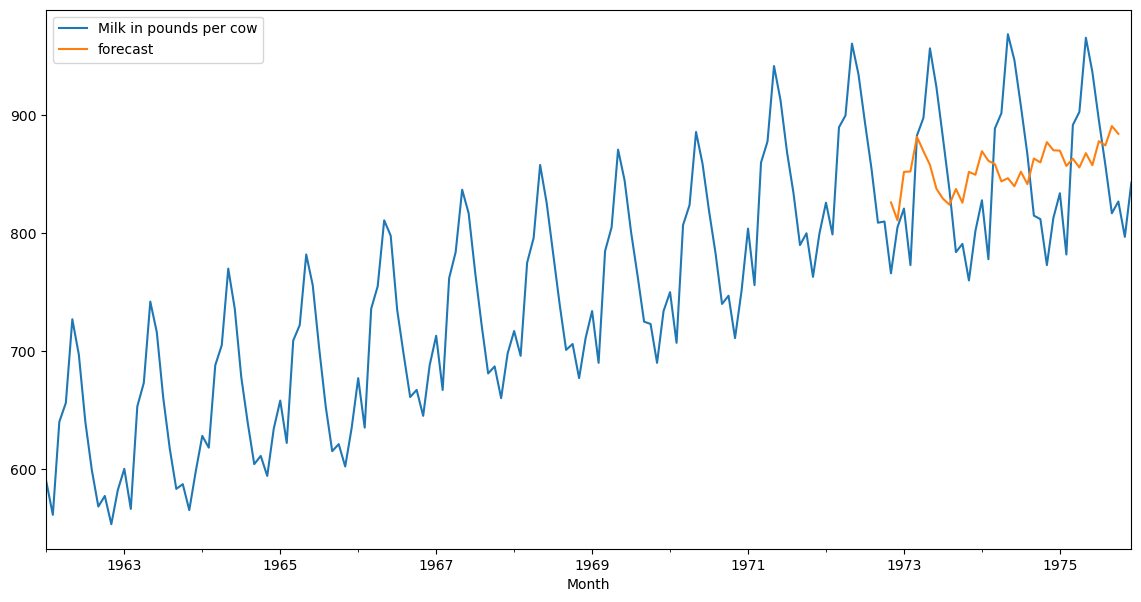

In [68]:
df['forecast'] = results.predict(start = 130,end = 165,dynamic = True)  
df[['Milk in pounds per cow','forecast']].plot(figsize = (14, 7))

In [69]:
from pandas.tseries.offsets import DateOffset

In [70]:
future_dates = [df.index[-1] + DateOffset(months = x) for x in range(0,21) ]

In [71]:
future_dates

[Timestamp('1975-12-01 00:00:00'),
 Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00')]

In [72]:
future_dates_df = pd.DataFrame(index = future_dates[1:],columns = df.columns)

In [73]:
future_df = pd.concat([df,future_dates_df])

In [74]:
future_df.head()

,Milk in pounds per cow,Milk First Difference,Seasonal Difference,forecast
1962-01-01,589.0,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN
1962-03-01,640.0,79.0,NaN,NaN
1962-04-01,656.0,16.0,NaN,NaN
1962-05-01,727.0,71.0,NaN,NaN


In [75]:
future_df.tail()

,Milk in pounds per cow,Milk First Difference,Seasonal Difference,forecast
1977-04-01,NaN,NaN,NaN,NaN
1977-05-01,NaN,NaN,NaN,NaN
1977-06-01,NaN,NaN,NaN,NaN
1977-07-01,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN


<Axes: >

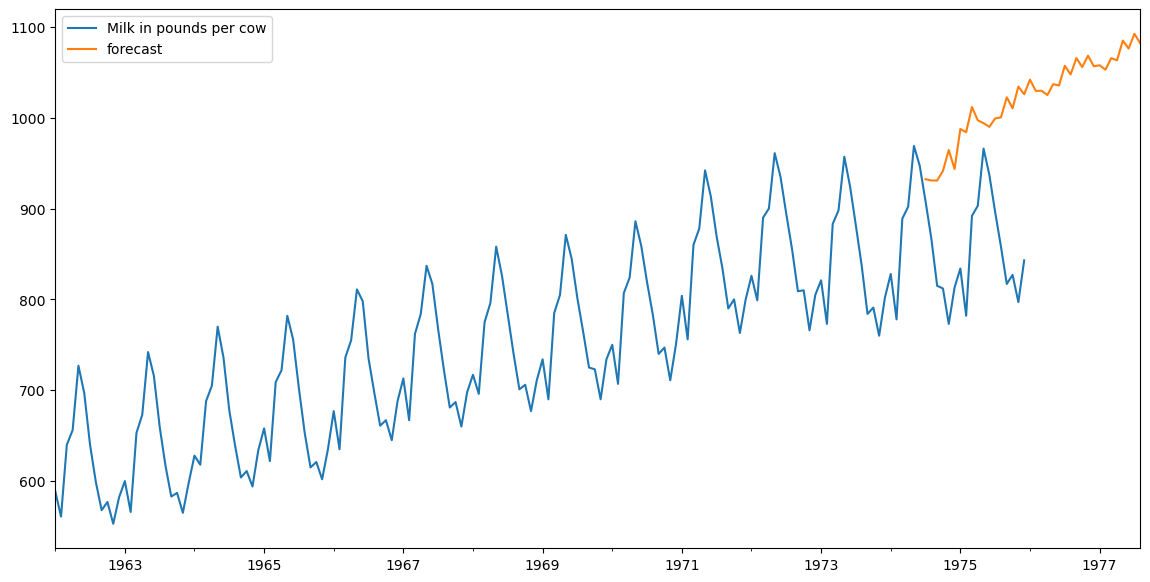

In [76]:
future_df['forecast'] = results.predict(start = 150, end = 190,dynamic= True)  
future_df[['Milk in pounds per cow', 'forecast']].plot(figsize = (14, 7)) 